In [28]:
from pathlib import Path
import csv
import matplotlib.pyplot as plt
from datetime import datetime
import statistics

0 STATION
1 NAME
2 DATE
3 TAVG
4 TMAX
5 TMIN
The average high was: 49.67307692307692


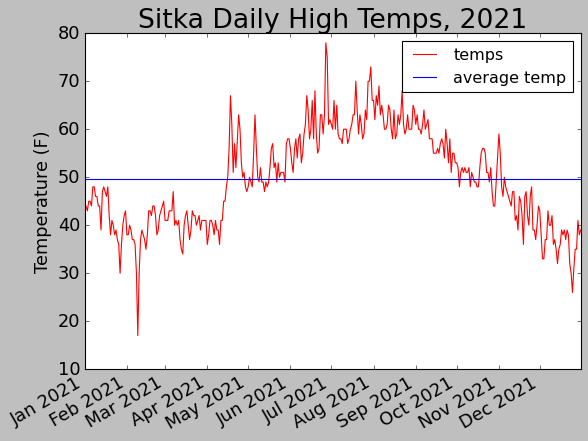

In [29]:
path = Path(r"C:\Users\jonat\OneDrive\Documents\GitHub\Python-Scratch-Repo\python_work\Downloading_Data\weather_data\sitka_weather_2021_simple.csv")
lines = path.read_text().splitlines()
'''This will read the file and chain the .splitlines method to get a list of all lines in the file which is then assigned to the variable lines'''

reader = csv.reader(lines)
'''This is an object to parse each line'''

header_row = next(reader)
'''The next function returns the next lien starting from the beginning. In this file the first line is the header'''

#print(header_row)

for index, column_header in enumerate(header_row):
    print(index,column_header)

'''Can rewrite this to use list comprehension
dates, highs = [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    high = int(row[4])
    dates.append(current_date)
    highs.append(high)
'''
    
data = [(datetime.strptime(row[2], '%Y-%m-%d'), int(row[4])) for row in reader]

dates = [item[0] for item in data]
highs = [item[1] for item in data]
avg = statistics.mean(highs)

print('The average high was: ' + str(avg))
#print(dates)
#print(highs)

#Plot the high temps
plt.style.use('classic')
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red', label= 'temps')
plt.axhline(y=avg,color='blue', linestyle = '-', label= 'average temp')

plt.legend()
ax.set_title("Sitka Daily High Temps, 2021", fontsize = 24)
ax.set_xlabel('',fontsize=16)
fig.autofmt_xdate()
ax.set_ylabel('Temperature (F)',fontsize=16)
ax.tick_params(labelsize=16)

plt.show()


